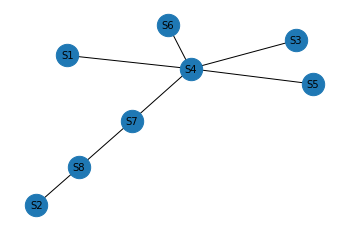

Distances from S1: 1, 2, 2, 2, 2, 3, 4
Distances from S2: 1, 2, 3, 4, 4, 4, 4
Distances from S3: 1, 2, 2, 2, 2, 3, 4
Distances from S4: 1, 1, 1, 1, 1, 2, 3
Distances from S5: 1, 2, 2, 2, 2, 3, 4
Distances from S6: 1, 2, 2, 2, 2, 3, 4
Distances from S7: 1, 1, 2, 2, 2, 2, 2
Distances from S8: 1, 1, 2, 3, 3, 3, 3
Sums of distances: {'S1': 16, 'S2': 22, 'S3': 16, 'S4': 10, 'S5': 16, 'S6': 16, 'S7': 12, 'S8': 16}
Eccentricities: {'S1': 4, 'S2': 4, 'S3': 4, 'S4': 3, 'S5': 4, 'S6': 4, 'S7': 2, 'S8': 3}
Median of the graph is node: S4
Center of the graph is node: S7
The point where our army will initially attack in order to strike first the strike group of the B empire is: S7 
and the point at which our army will attack in order to destroy the supply depot is: S4


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(np.array([[0,0,0,1,0,0,0,0],
                                  [0,0,0,0,0,0,0,1],
                                  [0,0,0,1,0,0,0,0],
                                  [1,0,1,0,1,1,1,0],
                                  [0,0,0,1,0,0,0,0],
                                  [0,0,0,1,0,0,0,0],
                                  [0,0,0,1,0,0,0,1],
                                  [0,1,0,0,0,0,1,0]]))

# Define the mapping of old node names to new node names
mapping = {0: "S1", 1: "S2", 2: "S3", 3: "S4", 4: "S5", 5: "S6", 6: "S7", 7: "S8"}

# Relabel the nodes with the new names
G = nx.relabel_nodes(G, mapping)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.axis("off")
plt.show()

def print_all_distances(graph):
    """
    Calculates the distances from every node to all other nodes in the graph,
    and prints them in the format "source_node: distance_1, distance_2, ..., distance_N".
    Also returns a dictionary containing the sum of the distances for each node.
    """
    sums = {}
    for source in graph.nodes():
        distances = nx.shortest_path_length(graph, source=source)
        dist_list = [str(distances[target]) for target in distances if target != source]
        dist_str = ", ".join(dist_list)
        print(f"Distances from {source}: {dist_str}")
        sums[source] = sum(distances[target] for target in distances if target != source)
    return sums

sums = print_all_distances(G)
print(f"Sums of distances: {sums}")

def eccentricity(graph):
    """
    Calculates the eccentricity of each node in the graph, defined as the maximum distance
    from the node to any other node in the graph.
    """
    eccentricities = {}
    for node in graph.nodes():
        distances = nx.shortest_path_length(graph, source=node)
        max_distance = max(distances.values())
        eccentricities[node] = max_distance
    return eccentricities

ecc = eccentricity(G)
print(f"Eccentricities: {ecc}")

# Calculate the median of the graph (minimum sum of distances)
median = min(sums, key=sums.get)

# Calculate the center of the graph (minimum eccentricity)
center = min(ecc, key=ecc.get)

# Print the results
print(f"Median of the graph is node: {median}")
print(f"Center of the graph is node: {center}")
print(f"The point where our army will initially attack in order to strike first the strike group of the B empire is: {center}", 
      "\n"f"and the point at which our army will attack in order to destroy the supply depot is: {median}")